<a href="https://colab.research.google.com/github/SaranyaBayaneni/First/blob/main/DeepLearning_working_with_abalone_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential


In [ ]:
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [ ]:
abalone_data=pd.read_csv("abalone.csv")

In [ ]:
abalone_data['Gender']=abalone_data['Gender'].map({'M':0,'F':1,'I':2})

In [ ]:
x=abalone_data.drop('Rings',axis=1)
y=abalone_data['Rings']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.describe()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.956301,0.524964,0.408518,0.139790,0.830838,0.360561,0.180832,0.239682
std,0.827958,0.119137,0.098687,0.042514,0.491583,0.223018,0.109444,0.139941
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500
25%,0.000000,0.450000,0.350000,0.115000,0.443000,0.186500,0.093000,0.130000
50%,1.000000,0.545000,0.425000,0.140000,0.802000,0.337000,0.171000,0.234000
75%,2.000000,0.615000,0.480000,0.165000,1.151000,0.503500,0.253500,0.328500
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000


In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)

In [ ]:
x_test_scaled=scaler.transform(x_test)

In [ ]:
pd.DataFrame(x_train_scaled).describe()

,0,1,2,3,4,5,6,7
count,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03
mean,-1.254775e-16,5.635852e-16,2.041667e-16,-3.105036e-16,-1.063368e-17,2.530817e-16,1.680122e-16,1.828994e-16
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00
min,-1.155183e+00,-3.777412e+00,-3.582758e+00,-3.288610e+00,-1.686311e+00,-1.612494e+00,-1.647965e+00,-1.702271e+00
25%,-1.155183e+00,-6.293175e-01,-5.930591e-01,-5.832029e-01,-7.890755e-01,-7.805961e-01,-8.026546e-01,-7.838882e-01
50%,5.278772e-02,1.681999e-01,1.670339e-01,4.928971e-03,-5.867303e-02,-1.056604e-01,-8.985185e-02,-4.060562e-02
75%,1.260759e+00,7.558443e-01,7.244354e-01,5.930609e-01,6.513840e-01,6.410292e-01,6.640741e-01,6.347810e-01
max,1.260759e+00,2.434828e+00,2.447313e+00,2.329495e+01,4.058233e+00,5.056140e+00,5.292723e+00,5.469691e+00


In [ ]:
model=Sequential()
model.add(Dense(8,input_dim=x_train_scaled.shape[1],activation='relu'))

In [ ]:
model.add(Dense(1,activation='linear'))

In [ ]:
model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mse'])

In [ ]:
history=model.fit(x_train_scaled,y_train,epochs=50,batch_size=32,validation_data=(x_test_scaled,y_test))

Epoch 1/50
105/105 [==============================] - 4s 8ms/step - loss: 107.8615 - mse: 107.8615 - val_loss: 99.2303 - val_mse: 99.2303
Epoch 2/50
105/105 [==============================] - 1s 6ms/step - loss: 91.7320 - mse: 91.7320 - val_loss: 83.8030 - val_mse: 83.8030
Epoch 3/50
105/105 [==============================] - 0s 3ms/step - loss: 76.3098 - mse: 76.3098 - val_loss: 70.0058 - val_mse: 70.0058
Epoch 4/50
105/105 [==============================] - 0s 3ms/step - loss: 62.5818 - mse: 62.5818 - val_loss: 57.0563 - val_mse: 57.0563
Epoch 5/50
105/105 [==============================] - 0s 3ms/step - loss: 49.6798 - mse: 49.6798 - val_loss: 44.4093 - val_mse: 44.4093
Epoch 6/50
105/105 [==============================] - 0s 3ms/step - loss: 36.9380 - mse: 36.9380 - val_loss: 30.9000 - val_mse: 30.9000
Epoch 7/50
105/105 [==============================] - 0s 3ms/step - loss: 26.0993 - mse: 26.0993 - val_loss: 22.2842 - val_mse: 22.2842
Epoch 8/50
105/105 [==========================

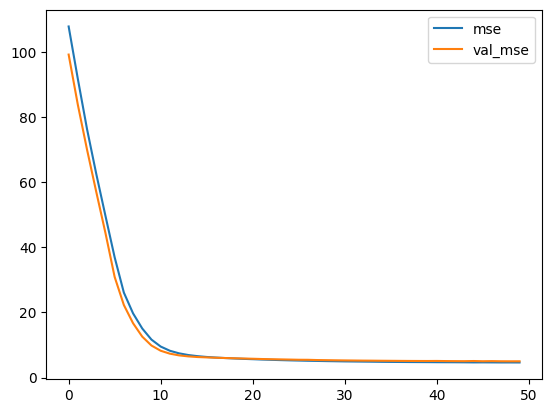

In [ ]:
plt.plot(history.history["mse"])
plt.plot(history.history["val_mse"])
plt.legend(["mse","val_mse"])
plt.show()

In [ ]:
loss,mae=model.evaluate(x_test_scaled,y_test)
print(f"MAE on test set:{mae}")

27/27 [==============================] - 0s 3ms/step - loss: 4.9879 - mse: 4.9879
MAE on test set:4.987868309020996


In [ ]:
Gender = float(input("Enter Gender - 0 for female, 1 for male, 2 for Infant: "))
length = float(input("Enter Length: "))
Diameter = float(input("Enter Diameter: "))
Height = float(input("Enter Height: "))
Wholeweight = float(input("Enter Whole weighr: "))
Shuckedweight = float(input("Enter Shucked weight: "))
Visceraweight = float(input("Enter Viscera weight: "))
Shellweight = float(input("Enter Shell weight: "))
data = {"Gender":[Gender],
"Length":[length],
"Diameter":[Diameter],
"Height":[Height],
"Whole weight":[Wholeweight],
"Shucked weight":[Shuckedweight],
"Viscera weight":[Visceraweight],
"Shell weight":[Shellweight]}
data = pd.DataFrame(data)
prediction = model.predict(data)
print(np.round(prediction))

Enter Gender - 0 for female, 1 for male, 2 for Infant: 0.0000
Enter Length: 0.4763
Enter Diameter: .07932864
Enter Height: .2319475
Enter Whole weighr: .6894
Enter Shucked weight: .95078
Enter Viscera weight: .89476
Enter Shell weight: .4365
1/1 [==============================] - 0s 86ms/step
[[9.]]
